[k-NN Demo](http://vision.stanford.edu/teaching/cs231n-demos/knn/)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from plotnine import aes, ggplot, geom_point, geom_line, geom_smooth
from sklearn import datasets, neighbors
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
iris_df = datasets.load_iris(as_frame=True)
iris_df

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [ ]:
iris = datasets.load_iris()
X = iris['data']
y = iris['target']

In [ ]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# Preprocess data
X = StandardScaler().fit_transform(X)

# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=2)

In [ ]:
X_train[:5]

array([[ 0.4321654 , -0.59237301,  0.59224599,  0.79067065],
       [-0.90068117,  0.55861082, -1.16971425, -0.92054774],
       [-0.29484182, -0.36217625, -0.08980313,  0.13250973],
       [ 2.24968346,  1.70959465,  1.6721571 ,  1.31719939],
       [-0.53717756, -0.13197948,  0.42173371,  0.3957741 ]])

In [ ]:
ks = range(1, 30)
accuracies = []
for k in ks:
  clf = neighbors.KNeighborsClassifier(k)
  clf.fit(X_train, y_train)
  y_pred=clf.predict(X_test)
  accuracies.append(accuracy_score(y_test,y_pred))

In [ ]:
df_og = pd.DataFrame({'k_og':ks, 'Accuracy_og':accuracies})
df_og.head()

,k_og,Accuracy_og
0,1,1.000000
1,2,1.000000
2,3,0.966667
3,4,1.000000
4,5,0.966667


In [ ]:
def most_common(lst):
    #Returns the most common element in a list
    return max(set(lst), key=lst.count)

In [ ]:
def euclidean(point, data):
    #Euclidean distance between a point  & data
    return np.sqrt(np.sum((point - data)**2, axis=1))

In [ ]:
def manhattan(point, data):
  return np.sum(np.abs(point - data), axis=1)

In [ ]:
class KNeighborsClassifier():

    def __init__(self, k=5, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])
        return list(map(most_common, neighbors))

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy

In [ ]:
accuracies = []
ks = range(1, 30)
for k in ks:
    knn = KNeighborsClassifier(k=k)
    knn.fit(X_train, y_train)
    accuracy = knn.evaluate(X_test, y_test)
    accuracies.append(accuracy)

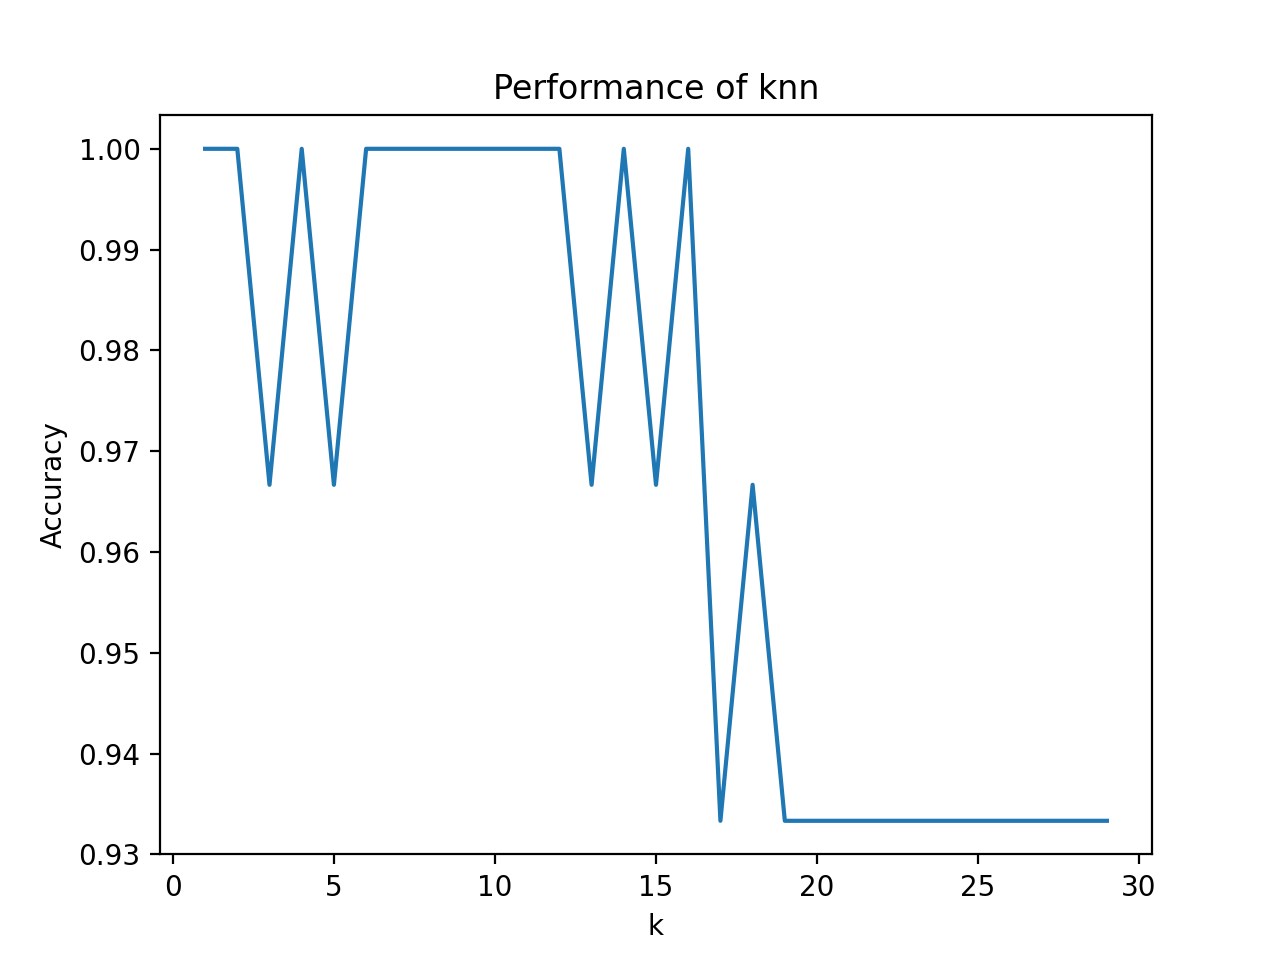

In [ ]:
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()

In [ ]:
df_sc = pd.DataFrame({'k_sc':ks, 'Accuracy_sc':accuracies})
df_sc.head()

,k_sc,Accuracy_sc
0,1,1.000000
1,2,1.000000
2,3,0.966667
3,4,1.000000
4,5,0.966667


In [ ]:
result = pd.concat([df_og, df_sc], axis=1)
result

,k_og,Accuracy_og,k_sc,Accuracy_sc
0,1,1.000000,1,1.000000
1,2,1.000000,2,1.000000
2,3,0.966667,3,0.966667
3,4,1.000000,4,1.000000
4,5,0.966667,5,0.966667
5,6,1.000000,6,1.000000
6,7,1.000000,7,1.000000
7,8,1.000000,8,1.000000
8,9,1.000000,9,1.000000
9,10,1.000000,10,1.000000


/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


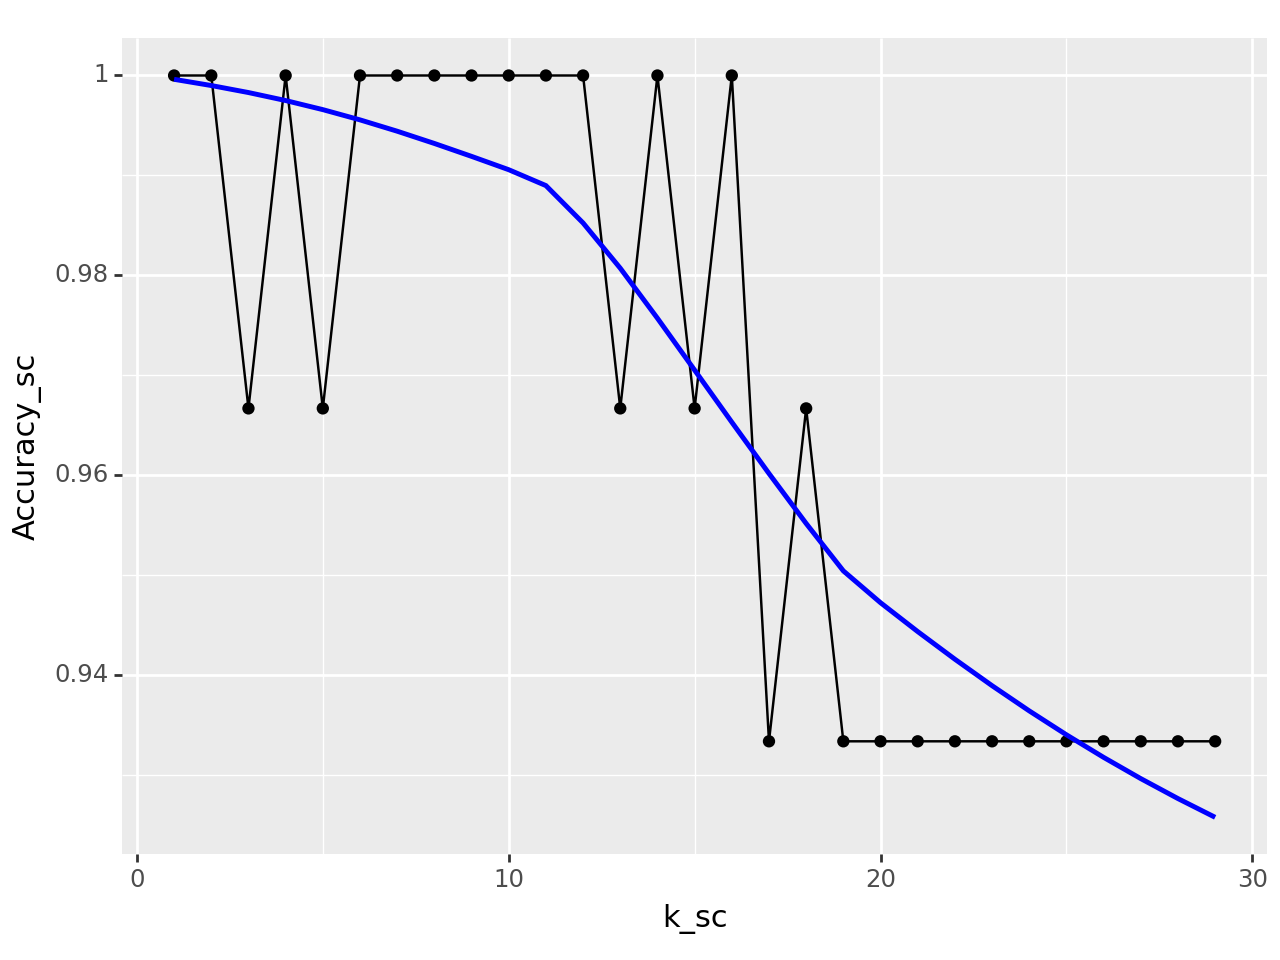

/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


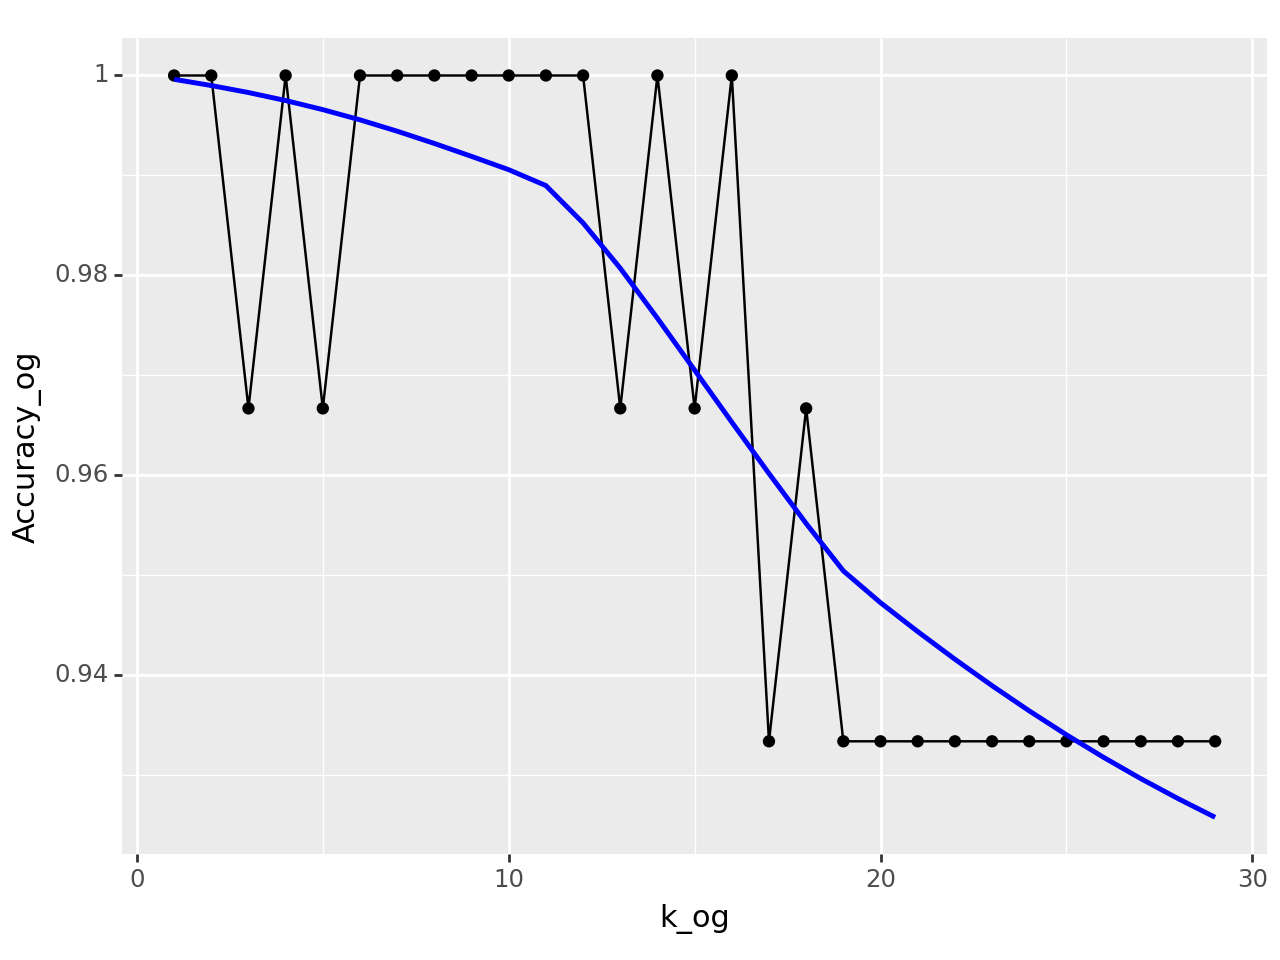

(<Figure Size: (640 x 480)>, <Figure Size: (640 x 480)>)

In [ ]:
(
  ggplot(df_sc, aes(x='k_sc', y='Accuracy_sc'))
  +geom_point()
  +geom_line()
  +geom_smooth(color='blue'),

  ggplot(df_og, aes(x='k_og', y='Accuracy_og'))
  +geom_point()
  +geom_line()
  +geom_smooth(color='blue')
)